In [4]:
#first i need data from a previous run
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, metrics, Model
from tensorflow.keras.callbacks import Callback
from scipy.stats import truncnorm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import normalize
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import numpy as np
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import h5py
import datetime
from scipy.optimize import curve_fit
import math
from scipy import asarray as ar,exp
import pylab as plb
import tqdm
from tqdm import tqdm
import time
import progressbar

In [5]:
dataset = h5py.File('simu_HDF_thistimeforReal.h5', 'r') #load data
num_diodes = dataset['Num_diodes'][...] #separate the data into each key within the data file
x_pos = (dataset['Xpos'][...])/100
y_pos = (dataset['Ypos'][...])/100
histgrid = dataset['histgrid'][...]
histgrid = histgrid[:-10,:,:] #redefine the shape and size of histgrid by removing the last 10 events
output = np.vstack((x_pos,y_pos)) #define new, single variable for x and y position
output = np.transpose(output) #original definition was sideways, so we transposed it

where_are_NaNs = isnan(histgrid) #removes any NaN values within histgrid; shouldn't be a problem with bad values removed
histgrid[where_are_NaNs] = 0

print(histgrid.shape)

dataset.close()

(991, 342, 132)


In [6]:
def data_compile(histdata):
    data = []  #creates empty arrays for data and labels
    labels = []
    for i in range(histdata.shape[1]):
        for j in range(0,histdata.shape[0]):
            data.append(histdata[j,i,:]) #puts histgrid data inside of "data"
            labels.append(output[i]) #puts x,y _pos into "labels"
    return(np.array(data),np.array(labels))

all_data, all_labels = data_compile(histgrid)

#to make sure everything is the correct shape
print(all_data.shape)
print(all_labels.shape)

(338922, 132)
(338922, 2)


In [7]:
all_data = normalize(all_data,axis = 1)
print(np.max(all_data))

0.8395246220687987


In [8]:
#separate the test data as done above
x1_data_all = (all_data[: , :33])*100
x2_data_all = (all_data[:, 33:66])*100
y1_data_all = (all_data[:, 66:99])*100
y2_data_all = (all_data[:, 99:132])*100

#labels kept so they have the same indices
x_label_all = all_labels[ : , 0 ]
y_label_all = all_labels[ : , 1 ]

print(x1_data_all.shape)
print(x_label_all.shape)

print(np.min(x1_data_all))

(338922, 33)
(338922,)
0.0


In [9]:
#gaussian fit function
def gaussianpdf(x, k, sigma, mu):
    return k*np.exp(-(x-mu)**2/(2*sigma**2))

In [97]:
#function to (hopefully) fit gaussians (and thus, centroids which is what we want) onto all data sets
def centroidmm(x, y):
    try:
        if np.max(y) > 20:
            kvalue = np.max(y)+(np.max(y)/2)
        else:
            kvalue = np.max(y)
        popt, _ = curve_fit(gaussianpdf, x, y, bounds=(0, [kvalue,10., 33.]))
        return (popt[2]/33)*100-48 #converts location from diode number to mm (measurement of x_pos & y_pos)
    except RuntimeError:
        return -5555

#function to (hopefully) fit gaussians (and thus, centroids which is what we want) onto all data sets
def centroiddn(x, y):
    try:
        if np.max(y) > 20:
            kvalue = np.max(y)+(np.max(y)/2)
        elif np.max(y) == 0:
            kvalue = 1
        else:
            kvalue = np.max(y)
        popt, _ = curve_fit(gaussianpdf, x, y, bounds=(0, [kvalue,7., 33.]))
        return popt[2]
    except RuntimeError:
        return -5555

In [23]:
#DO NOT RERUN UNLESS ABSOLUTELY NEEDED; TAKES A VERY LONG TIME   
x1_peaks = []
for i in tqdm(range(x1_data_all.shape[0])):
    x1_dn = centroiddn(np.arange(0,33,1), x1_data_all[i,:])
    x1_peaks.append(x1_dn)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000


In [24]:
x1_peaks = np.array(x1_peaks)
np.save("x1_peaks_file_all_1", x1_peaks)

In [25]:
#DO NOT RERUN UNLESS ABSOLUTELY NEEDED; TAKES A VERY LONG TIME
x2_peaks = []
for i in tqdm(range(x2_data_all.shape[0])):
    x2_dn = centroiddn(np.arange(0,33,1), x2_data_all[i,:])
    x2_peaks.append(x2_dn)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000


In [26]:
x2_peaks = np.array(x2_peaks)
np.save("x2_peaks_file_all_1", x2_peaks)

In [27]:
#DO NOT RERUN UNLESS ABSOLUTELY NEEDED; TAKES A VERY LONG TIME
y1_peaks = []
for i in tqdm(range(y1_data_all.shape[0])):
    y1_dn = centroiddn(np.arange(0,33,1), y1_data_all[i,:])
    y1_peaks.append(y1_dn)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000


In [28]:
y1_peaks = np.array(y1_peaks)
np.save("y1_peaks_file_all_1", y1_peaks)

In [29]:
#DO NOT RERUN UNLESS ABSOLUTELY NEEDED; TAKES A VERY LONG TIME
y2_peaks = []
for i in tqdm(range(x1_data_all.shape[0])):
    y2_dn = centroiddn(np.arange(0,33,1), y2_data_all[i,:])
    y2_peaks.append(y2_dn)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000


In [30]:
y2_peaks = np.array(y2_peaks)
np.save("y2_peaks_file_all_1", y2_peaks)

In [31]:
#formatting data to use in main notebook

In [6]:
#importing data so I'm not running over the other kernels
x1_peaks = np.load("x1_peaks_file_all_1.npy")
x2_peaks = np.load("x2_peaks_file_all_1.npy")
y1_peaks = np.load("y1_peaks_file_all_1.npy")
y2_peaks = np.load("y2_peaks_file_all_1.npy")

print(len(x1_peaks))
print(len(x2_peaks))
print(len(y1_peaks))
print(len(y2_peaks))

338922
338922
338922
338922


In [22]:
def find_peak_error(arr1data, arr2data):
    error_indices1 = np.where(arr1data == -5555 )
    error_indices2 = np.where(arr2data == -5555 )
        
    arr1data_df = pd.DataFrame(arr1data)
    arr2data_df = pd.DataFrame(arr2data)
        
    error_indices = np.unique(np.concatenate([error_indices1, error_indices2], axis = 1))
        
    return error_indices

In [23]:
def remove_peak_error(arr1data, arr2data, removearr):
    
    arr1data_df = pd.DataFrame(arr1data)
    arr2data_df = pd.DataFrame(arr2data)
        
    arr1data_df_fixed = arr1data_df.drop(arr1data_df.index[removearr])
    arr2data_df_fixed = arr2data_df.drop(arr2data_df.index[removearr])
        
    arr1data_fixed = arr1data_df_fixed.to_numpy()
    arr2data_fixed = arr2data_df_fixed.to_numpy()
        
    return arr1data_fixed, arr2data_fixed

In [24]:
#conversions from diode number to millimeters and vice versa
#might need to be updated if Yassid sends a better method of converting
def diodenum_to_mm(arr1data):
    convert = []
    for i in range(len(arr1data)):
        mm = (arr1data[i] /33)*100 - 48
        convert.append(mm)
    return np.concatenate(convert)

def mm_to_diodenum(arr1data):
    convert = []
    for i in range(len(arr1data)):
        diodenum = ((arr1data[i] + 48)/100)*33
        convert.append(diodenum)
    return np.concatenate(convert)

In [25]:
def average(arr1data, arr2data):
    avg = (arr1data + arr2data)/2
    return avg

In [11]:
x_errors_remove = find_peak_error(x1_peaks, x2_peaks)
y_errors_remove = find_peak_error(y1_peaks, y2_peaks)

all_error_indices = np.unique(np.concatenate([x_errors_remove, y_errors_remove]))

error_indices = np.array(all_error_indices)
np.save("error_indices", error_indices)

In [12]:
fixed_x_peaks = remove_peak_error(x1_peaks, x2_peaks, all_error_indices)

fixed_x1_peaks = fixed_x_peaks[0]
fixed_x2_peaks = fixed_x_peaks[1]

x_peaks = average(fixed_x1_peaks, fixed_x2_peaks)

x_peaks_mm = diodenum_to_mm(x_peaks)
print(x_peaks_mm)

[-11.72566795 -11.39965588 -11.27697396 ...   8.68566297   8.35194957
   8.67700899]


In [13]:
x_peaks_data = np.array(x_peaks_mm)
np.save("x_peaks_data_ALL", x_peaks_data)

In [14]:
fixed_y_peaks = remove_peak_error(y1_peaks, y2_peaks, all_error_indices)

fixed_y1_peaks = fixed_y_peaks[0]
fixed_y2_peaks = fixed_y_peaks[1]

y_peaks = average(fixed_y1_peaks, fixed_y2_peaks)

y_peaks_mm = diodenum_to_mm(y_peaks)
print(y_peaks_mm)

[-11.3134978  -11.72870128 -11.89686311 ...   8.38687597   8.4090021
   8.77971843]


In [15]:
y_peaks_data = np.array(y_peaks_mm)
np.save("y_peaks_data_ALL", y_peaks_data)

In [21]:
x_label_all_df = pd.DataFrame(x_label_all)

x_label_all_df_fixed = x_label_all_df.drop(x_label_all_df.index[error_indices])

x_label_all_arr = x_label_all_df_fixed.to_numpy()

print(x_label_all_arr.shape)
print(x_peaks_data.shape)

(318628, 1)
(318628,)


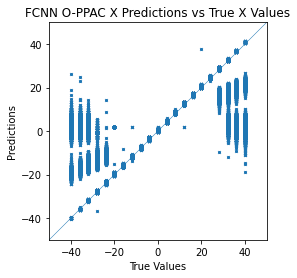

In [24]:
#graph showing the accuracy of FCNN model by comparing predicted and true x values
#should be as close to the diagonal as possible
new_x_labels = []
for i in range(len(x_label_all_arr)):
    new_x_labels.append([x_label_all_arr[i]])
np.array(new_x_labels)
new_x_labels[2]

a = plt.axes(aspect='equal')

plt.scatter(new_x_labels, x_peaks_data, s=6, marker = "x")
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [-50, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, linewidth = .5)
plt.title("FCNN O-PPAC X Predictions vs True X Values")
plt.show()